##  Liver Disease Prediction - Problem Definition

Liver diseases pose a significant public health challenge in India, often going undiagnosed until reaching critical stages due to a lack of early screening and diagnostic resources. The goal of this project is to build a machine learning model that can predict the presence of liver disease in patients based on clinical and biochemical features such as age, gender, bilirubin levels, and liver enzyme levels.

The model will be trained on the Indian Liver Patient Dataset, which contains patient records labeled as having or not having liver disease. The classification model should be able to generalize to unseen patient data and assist in identifying high-risk individuals early, enabling timely medical attention.

## Use Case: How Model Predictions Help Doctors

- **Early Screening:** Assists in identifying at-risk patients using routine test data.
- **Decision Support:** Acts as a second opinion for non-specialist doctors.
- **Patient Prioritization:** Helps in triaging patients for further diagnostic tests.
- **Preventive Care:** Supports early lifestyle intervention and monitoring.
- **Public Health:** Enables large-scale population risk assessment.


# Importing Necessary Libraries #

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings("ignore")

# Data Understanding #

Data Source: https://www.kaggle.com/code/benuvarghesebenjamin/liver-disease-prediction?select=indian_liver_patient.csv


Contents:<br>
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

In [2]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Dataset Column Descriptions

- **Age**: Age of the patient (in years).
- **Gender**: Gender of the patient (Male/Female).
- **Total_Bilirubin**: Total bilirubin level in the blood (mg/dL); elevated levels may indicate liver dysfunction.
- **Direct_Bilirubin**: Direct (conjugated) bilirubin level (mg/dL); helps differentiate types of liver disorders.
- **Alkaline_Phosphotase**: Alkaline phosphatase enzyme level (IU/L); elevated in liver disease and bile duct obstruction.
- **Alamine_Aminotransferase (ALT)**: Liver enzyme (IU/L); high values suggest liver damage.
- **Aspartate_Aminotransferase (AST)**: Another liver enzyme (IU/L); elevated levels often indicate liver injury.
- **Total_Protiens**: Total serum proteins (g/dL); includes albumin and globulin, important for liver function.
- **Albumin**: Major blood protein (g/dL); low levels may indicate liver disease.
- **Albumin_and_Globulin_Ratio**: Ratio of albumin to globulin proteins; abnormal ratios can suggest liver pathology.
 
- **Dataset**: Target variable — indicates if the patient has liver disease (1) or not (0).


In [6]:
#------------------------------------
#Inspecting the Missing Values
df.isnull().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
#-------------------------------------------------------
#Inspecting the Duplicated Records
df.duplicated().sum()

13

<br><br><b><u> All Independent Variables are Continous except Gender

In [9]:
unique_values = {x: df[x].nunique() for x in df.columns}
unique_values # Number of Unique Values in each Variable

{'Age': 72,
 'Gender': 2,
 'Total_Bilirubin': 113,
 'Direct_Bilirubin': 80,
 'Alkaline_Phosphotase': 263,
 'Alamine_Aminotransferase': 152,
 'Aspartate_Aminotransferase': 177,
 'Total_Protiens': 58,
 'Albumin': 40,
 'Albumin_and_Globulin_Ratio': 69,
 'Dataset': 2}

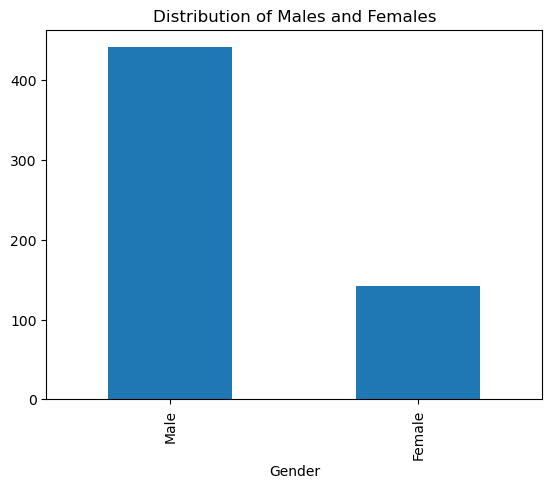

In [10]:
df['Gender'].value_counts().plot(kind='bar', title='Distribution of Males and Females')
plt.show()

In [11]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [12]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [13]:
df['Dataset'] = df['Dataset'].map({1:1, 2:0})

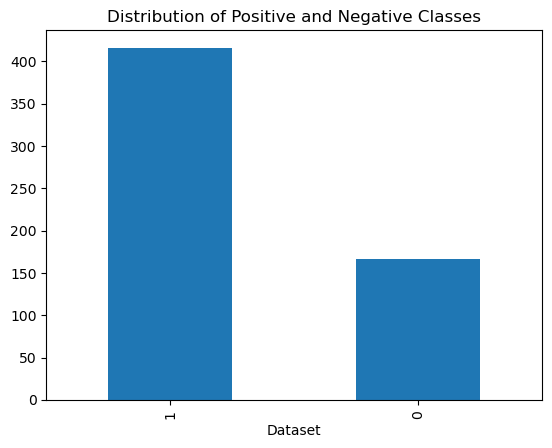

In [14]:
df['Dataset'].value_counts().plot(kind='bar', title=f'Distribution of Positive and Negative Classes',
                                 label='1=Positive, 0=Negative')
plt.show()

<b> Class Imbalance is Present with Positive being the Dominant Class.

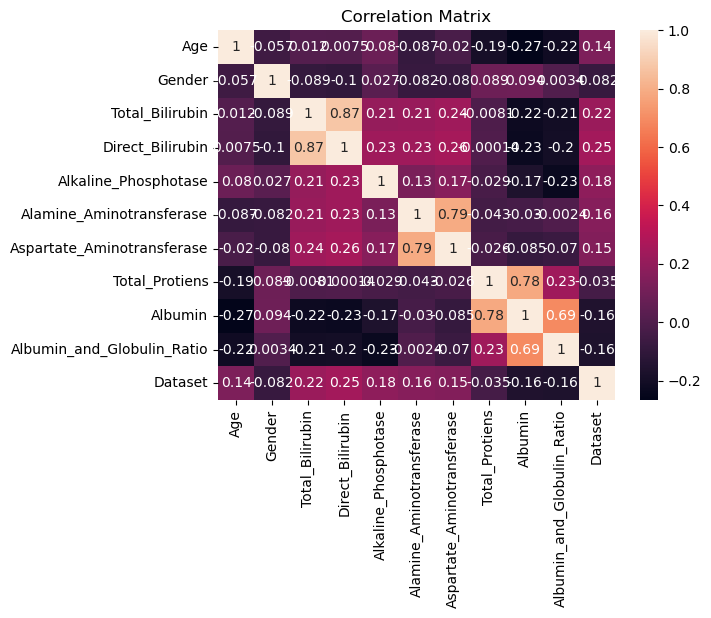

In [15]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True)
plt.show()

## Correlation Matrix Observations

- **Target Correlation (`Dataset` column):**
  - **Direct_Bilirubin (0.25)** and **Total_Bilirubin (0.22)** show the **strongest positive correlation** with liver disease.
  - **Alkaline_Phosphotase (0.18)**, **Alamine_Aminotransferase (0.16)**, and **Aspartate_Aminotransferase (0.15)** also show **moderate positive correlation** with the target.
  - **Albumin (-0.16)** and **Albumin_and_Globulin_Ratio (-0.16)** are **negatively correlated**, indicating that **lower protein levels** are associated with liver disease.

- **Feature-to-Feature Relationships:**
  - **Total_Bilirubin** and **Direct_Bilirubin** are **highly correlated (0.87)** — possible redundancy, so dimensionality reduction (e.g., PCA) or feature selection might help.
  - **ALT and AST (0.79)** are also **strongly correlated**, consistent with their co-elevation in liver conditions.
  - **Albumin and Total_Proteins (0.78)** show strong correlation, which is expected since albumin is a major component of total proteins.

- **Age Correlation:**
  - Weakly correlated with the target (0.13), so **age alone is not a strong predictor**, but could still be useful in combination.

- **Gender:**
  - Shows **very low correlation** with both target and features, indicating **minimal predictive value** on its own.

### Implications
- Will Consider removing or combining highly correlated features to reduce multicollinearity.
- Bilirubin levels and liver enzyme markers are likely the **most predictive features**.
- Negative correlation of albumin-related features with liver disease may point to **loss of liver synthetic function**, aligning with medical literature.


In [18]:
df.skew()

Age                           -0.029385
Gender                         1.197919
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
Dataset                       -0.947140
dtype: float64

In [19]:
df[['Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
    'Total_Bilirubin', 'Alkaline_Phosphotase', 'Direct_Bilirubin']].describe()

,Aspartate_Aminotransferase,Alamine_Aminotransferase,Total_Bilirubin,Alkaline_Phosphotase,Direct_Bilirubin
count,583.000000,583.000000,583.000000,583.000000,583.000000
mean,109.910806,80.713551,3.298799,290.576329,1.486106
std,288.918529,182.620356,6.209522,242.937989,2.808498
min,10.000000,10.000000,0.400000,63.000000,0.100000
25%,25.000000,23.000000,0.800000,175.500000,0.200000
50%,42.000000,35.000000,1.000000,208.000000,0.300000
75%,87.000000,60.500000,2.600000,298.000000,1.300000
max,4929.000000,2000.000000,75.000000,2110.000000,19.700000


### Domain refrences to check weather the data consists of Noise or just Outliers ###

| Metric                     | Normal Range (approx) |
| -------------------------- | --------------------- |
| Aspartate Aminotransferase | 10 – 40 U/L           |
| Alamine Aminotransferase   | 7 – 56 U/L            |
| Total Bilirubin            | 0.3 – 1.2 mg/dL       |
| Direct Bilirubin           | 0.0 – 0.3 mg/dL       |
| Alkaline Phosphatase       | 44 – 147 IU/L         |


In [20]:
# Alamine_Aminotransferase is extremly high in one case but it is representing an actual possible even but not an outlier

df[["Age", "Dataset"]][df["Alamine_Aminotransferase"] > 1000]

,Age,Dataset
27,34,1
47,40,1
117,32,1
118,32,1
119,32,1
135,66,1


In [21]:
df[["Age", "Dataset"]][df['Total_Bilirubin'] > 70]

,Age,Dataset
166,55,1


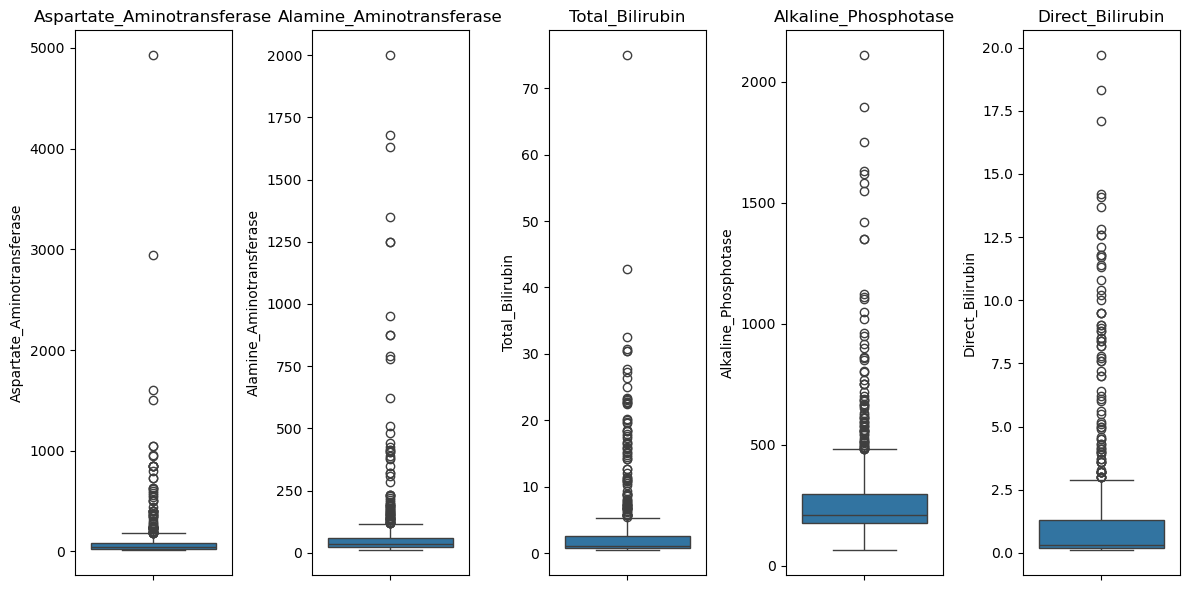

In [22]:
plt.figure(figsize=(12, 6))
for x, column in enumerate(['Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
                         'Total_Bilirubin', 'Alkaline_Phosphotase', 'Direct_Bilirubin']):
    plt.subplot(1, 5, x+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
df.dropna(inplace=True)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
X = df.drop(columns=["Dataset"])
y = df["Dataset"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Baseline Model #

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

columns_to_scale = X_train.drop(columns=["Gender"]).columns
columns_to_scale

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [21]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

sc = StandardScaler()
X_train_scaled[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
def metrics_calculation(model_name, X_train, y_train, type_):
    y_train_predict = model_name.predict(X_train)
    print(classification_report(y_train, y_train_predict))
    cm = confusion_matrix(y_train, y_train_predict, labels=[0,1])
    cmd = ConfusionMatrixDisplay(cm, display_labels=["No Liver Disease", "Liver Disease"])
    cmd.plot(cmap="Purples")
    plt.title(f"Confusion Matrix on {type_} Data")
    plt.show()

              precision    recall  f1-score   support

           0       0.56      0.14      0.23       106
           1       0.75      0.96      0.84       290

    accuracy                           0.74       396
   macro avg       0.65      0.55      0.53       396
weighted avg       0.70      0.74      0.68       396



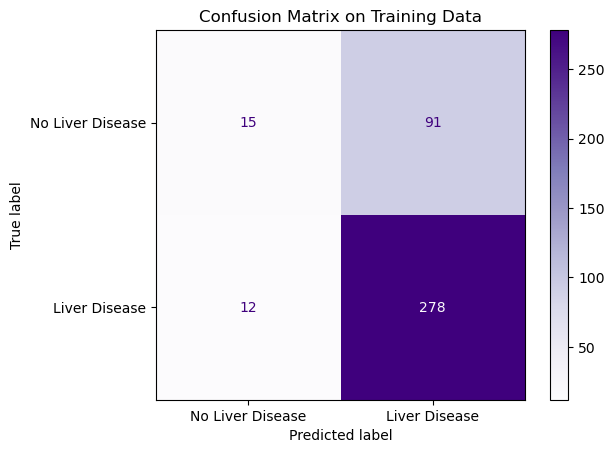

In [24]:
metrics_calculation(lr_model, X_train_scaled, y_train, "Training")

              precision    recall  f1-score   support

           0       0.53      0.18      0.27        56
           1       0.70      0.92      0.79       114

    accuracy                           0.68       170
   macro avg       0.61      0.55      0.53       170
weighted avg       0.64      0.68      0.62       170



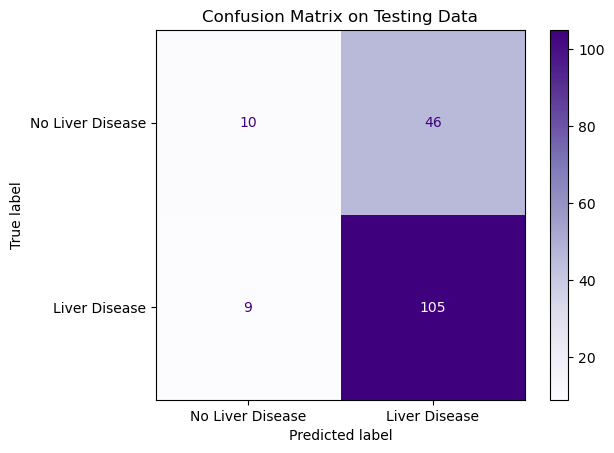

In [25]:
metrics_calculation(lr_model, X_test_scaled, y_test, "Testing")

<h4>
    <ul>
        <li>
            The above is the performance of the Baseline Model where the class imbalance is sverely affecting the baseline model.
        </li>
        <li>
            The Baseline model also establishes that the data consists of Non-Linear pattern, hence we must also consider techniques that work well for capturing the non-linear pattern like DecisionTrees, Bagging and Boosting Techniques
        </li>
    </ul>
</h4>

## Experimenting with Tree Based Models ##
### 1) Decision Tree Classifier ###

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       290

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



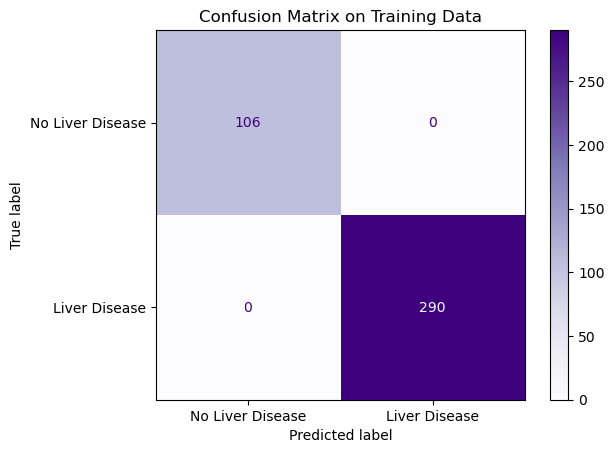

In [27]:
metrics_calculation(dt_model, X_train, y_train, "Training")

              precision    recall  f1-score   support

           0       0.23      0.14      0.18        56
           1       0.64      0.76      0.70       114

    accuracy                           0.56       170
   macro avg       0.44      0.45      0.44       170
weighted avg       0.51      0.56      0.53       170



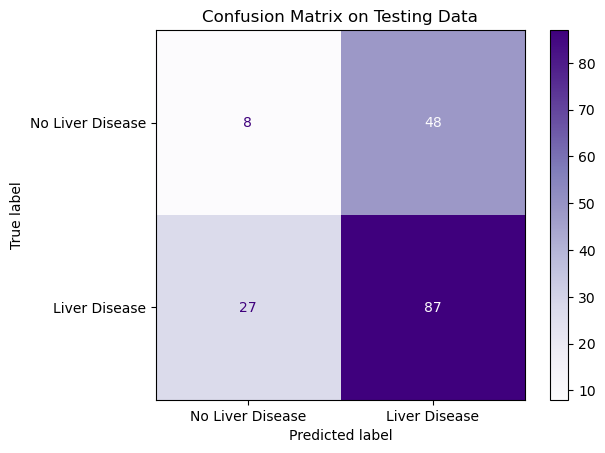

In [28]:
metrics_calculation(dt_model, X_test, y_test, "Testing")

<h4>
    Using GridSearchCV because Model Performance did not Improve
</h4>

In [29]:
estimator = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'max_depth': [None, 3, 5, 7, 10, 15],           
    'min_samples_split': [2, 5, 10, 20],            
    'min_samples_leaf': [1, 2, 4, 6],           
    'max_features': [None, 'sqrt', 'log2']          
}

In [32]:
grid_dt = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring="recall"
)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall')

In [33]:
grid_dt.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [35]:
#--- Again Retraining the DecisionTree Model to finetue

dt_model = DecisionTreeClassifier(
    criterion="log_loss",
    max_depth=3,
    max_features='log2',
    min_samples_leaf=6,
    min_samples_split=2
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='log2',
                       min_samples_leaf=6)

              precision    recall  f1-score   support

           0       0.56      0.34      0.42        56
           1       0.73      0.87      0.79       114

    accuracy                           0.69       170
   macro avg       0.64      0.60      0.61       170
weighted avg       0.67      0.69      0.67       170



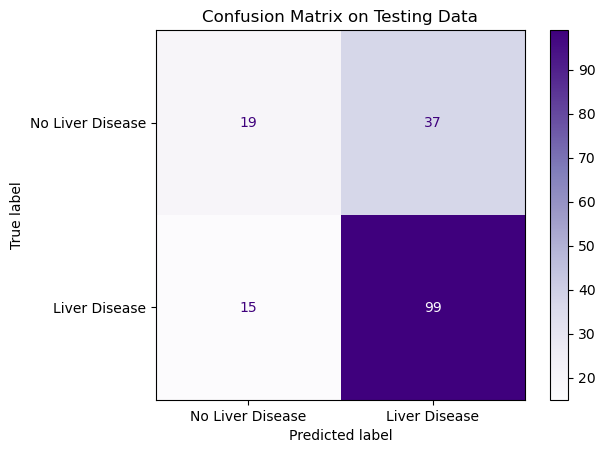

In [37]:
metrics_calculation(dt_model, X_test, y_test, "Testing")

<h4>
    Even though the model has improved compared to the baseline model, the Accuracy of the model is still 69%
</h4>

## 2) RandomForestClassifier ##

In [38]:
rf_model = RandomForestClassifier()

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.48      0.27      0.34        56
           1       0.71      0.86      0.77       114

    accuracy                           0.66       170
   macro avg       0.59      0.56      0.56       170
weighted avg       0.63      0.66      0.63       170



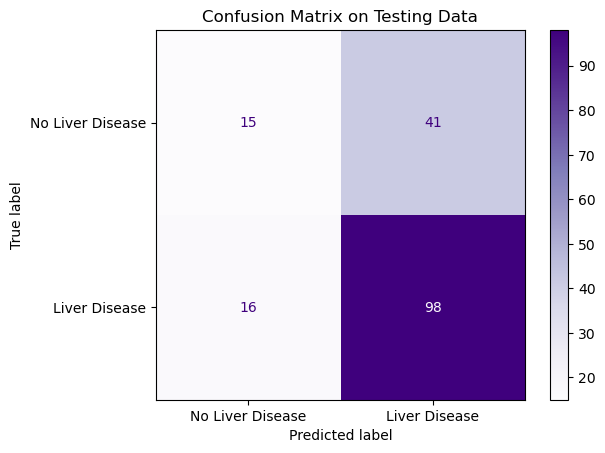

In [41]:
metrics_calculation(rf_model, X_test, y_test, "Testing")

In [48]:
# Defining a broader parameter space
param_dist = {
    'n_estimators': np.arange(50, 301, 50),              
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Randomized search setup
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           
    cv=5,               
    scoring='accuracy',  
    n_jobs=-1,           
    random_state=42
)


random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Best CV Score: 0.7500316455696202


In [50]:
rf_model = RandomForestClassifier(
    n_estimators=250,
    min_samples_split=10,
    min_samples_leaf = 2,
    max_features=None,
    max_depth=10,
    criterion="gini",
    bootstrap=True
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=250)

              precision    recall  f1-score   support

           0       0.42      0.20      0.27        56
           1       0.69      0.87      0.77       114

    accuracy                           0.65       170
   macro avg       0.56      0.53      0.52       170
weighted avg       0.60      0.65      0.60       170



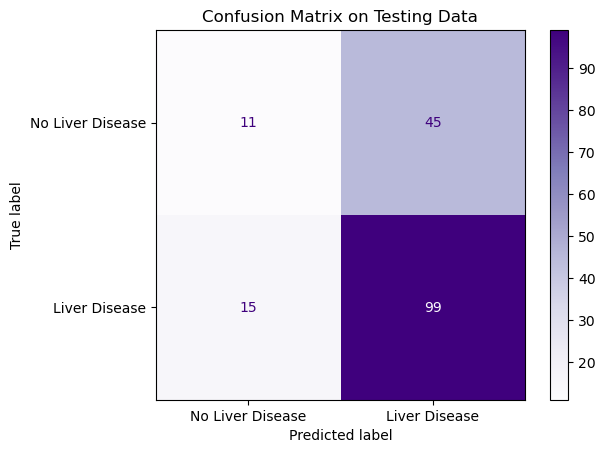

In [51]:
metrics_calculation(rf_model, X_test, y_test, "Testing")

<h4>
    The Accuracy of the Model still did not improve, as it is ~65% after fine tuning
</h4>

### 3) AdaBoostClassifier ###

In [54]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.49      0.32      0.39        56
           1       0.71      0.83      0.77       114

    accuracy                           0.66       170
   macro avg       0.60      0.58      0.58       170
weighted avg       0.64      0.66      0.64       170



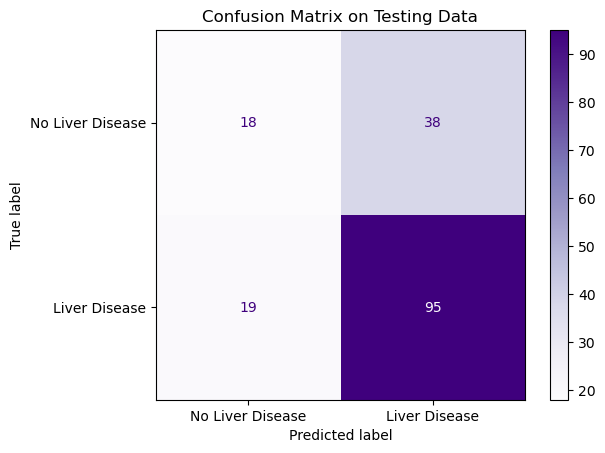

In [55]:
metrics_calculation(ada_model, X_test, y_test, "Testing")

In [60]:
estimator = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],               
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],  
}

# Grid search setup
grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,                
    scoring='accuracy',  
    n_jobs=-1            # Uses all CPU cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 50}
Best CV Score: 0.7323734177215189


In [61]:
ada_model = AdaBoostClassifier(
    learning_rate=0.05,
    n_estimators=50
)


ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.05)

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        56
           1       0.67      0.98      0.80       114

    accuracy                           0.67       170
   macro avg       0.59      0.51      0.43       170
weighted avg       0.62      0.67      0.56       170



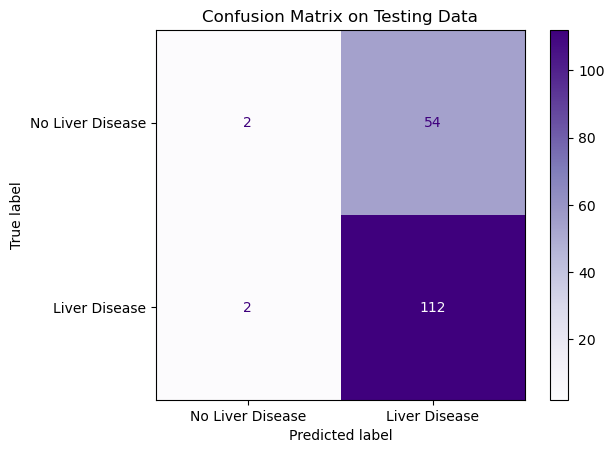

In [62]:
metrics_calculation(ada_model, X_test, y_test, "Testing")

<h4>
    The Recall of Minority Class has completly dropped
</h4>

### GradientBoostingClassifier ###

In [63]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.45      0.27      0.34        56
           1       0.70      0.84      0.76       114

    accuracy                           0.65       170
   macro avg       0.58      0.55      0.55       170
weighted avg       0.62      0.65      0.62       170



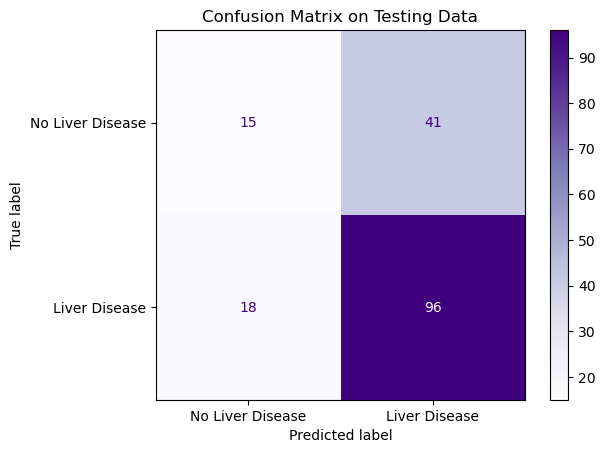

In [64]:
metrics_calculation(gb_model, X_test, y_test, "Testing")

In [65]:
estimator = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],         
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7],                  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': [None, 'sqrt', 'log2'],  
    'subsample': [1.0, 0.8, 0.6]              
}

# GridSearchCV setup
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator,
    param_grid,
    cv=5,                
    scoring='accuracy',  
    n_jobs=-1
)

# Fit the search
grid_search.fit(X_train, y_train)


# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Best CV Score: 0.7627531645569621


In [67]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features="sqrt",
    subsample=0.8
)

In [68]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=10, subsample=0.8)

              precision    recall  f1-score   support

           0       0.53      0.30      0.39        56
           1       0.72      0.87      0.79       114

    accuracy                           0.68       170
   macro avg       0.62      0.59      0.59       170
weighted avg       0.66      0.68      0.65       170



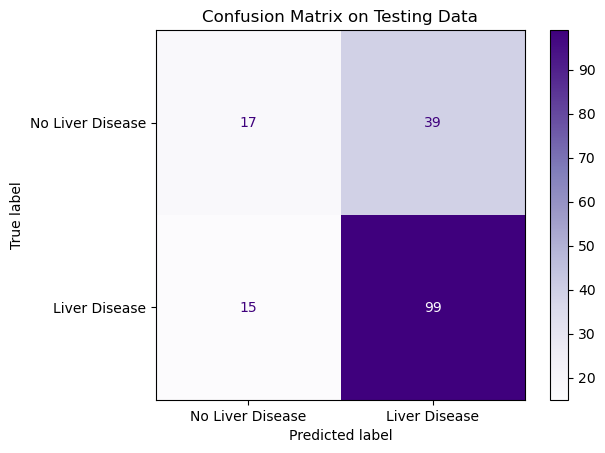

In [69]:
metrics_calculation(gb_model, X_test, y_test, "Testing")

### 4) XGB Classifier ###

In [70]:
from xgboost import XGBClassifier

In [71]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.48      0.25      0.33        56
           1       0.70      0.87      0.78       114

    accuracy                           0.66       170
   macro avg       0.59      0.56      0.55       170
weighted avg       0.63      0.66      0.63       170



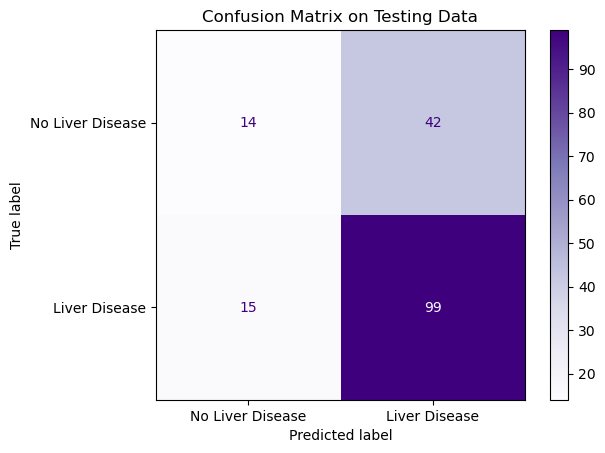

In [73]:
metrics_calculation(xg_model, X_test, y_test, "Testing")

In [74]:
estimator = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}


In [76]:
grid_xg = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.01, 0.1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='recall')

In [77]:
grid_xg.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.6}

In [78]:
xg_model = XGBClassifier(
  colsample_bytree=0.6,
  gamma=0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=1,
    n_estimators=50,
    reg_alpha=0,
    reg_lambda=1,
    subsample=0.6
)

In [79]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.67      1.00      0.80       114

    accuracy                           0.67       170
   macro avg       0.34      0.50      0.40       170
weighted avg       0.45      0.67      0.54       170



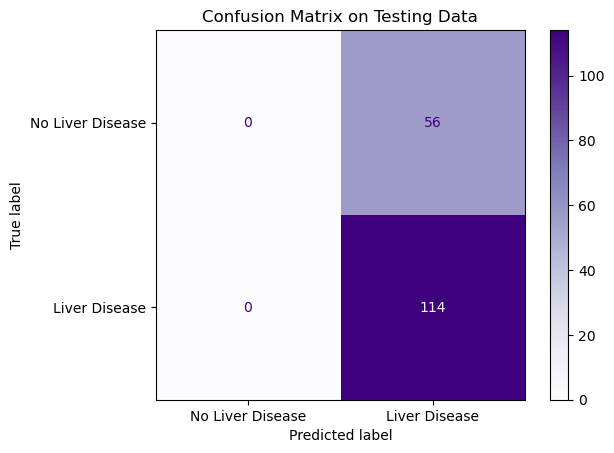

In [80]:
metrics_calculation(xg_model, X_test, y_test, "Testing")

<h4>
    The Model is completly ignoring the minority class.
    Neceesary steps and targeted error analysis must be done to tackle the problem.
</h4>